# 1. Feladatsor: megoldások
*(Normált tér, indukált mátrixnorma, kondíciószám, fixponttétel)*

### P1. Feladat

Legyen $x = [10^{200}, 1]$. Számítsuk ki a 2-es normáját kétféleképpen:

- $\sqrt{x_1^2 + x_2^2}$,
- $c\sqrt{\left(\frac{x_1}{c}\right)^2 + \left(\frac{x_2}{c}\right)^2},$

ahol $ c = \max\{|x_1|, |x_2|\}$. Mit tapasztalunk?

In [13]:
import numpy as np


In [14]:
x = np.array([1e200, 1])
x

array([1.e+200, 1.e+000])

In [15]:
sum((x / x.max())**2)**.5 *x.max()

np.float64(1e+200)

In [16]:
x**2

C:\Users\gubcs\AppData\Local\Temp\ipykernel_10904\1582502929.py:1: RuntimeWarning: overflow encountered in square
  x**2


array([inf,  1.])

### P2. Feladat
Írjunk programot, ami kiszámolja egy vektor $p$-normáját.

In [21]:
def p_norm(v: np.array, p: float):
    """ kiszamitja v p-normajat az elso tengely menten """
    # p ertelmes
    assert 1 <= p

    if 1/p == 0:
        return (abs(v)).max(axis=0)
        
    return ((abs(v)**p).sum(axis=0))**(1/p)

In [22]:
v = .5*np.array([3**.5, 1])

In [23]:
p_norm(v, 1)

np.float64(1.3660254037844386)

In [24]:
p_norm(v, 2)

np.float64(1.0)

In [25]:
p_norm(v, np.inf)

np.float64(0.8660254037844386)

### P3.* Feladat

Írjunk programot, ami adott $p$ esetén felrajzolja a $\| \, \|_p$ szerinti egységkört. Ábrázoljuk egy közös ábrán a $p=1,2,4, \infty$ eseteket.

In [10]:
def unit_circle(num_pts: int, p: float) -> np.array:
    ts = np.linspace(0, 2*np.pi, 201)
    xs = np.sin(ts)
    ys = np.cos(ts)

    xys = np.vstack((xs, ys))
    xys_normed = xys / p_norm(xys, p)
    
    return xys_normed

In [11]:
from matplotlib import pyplot as plt

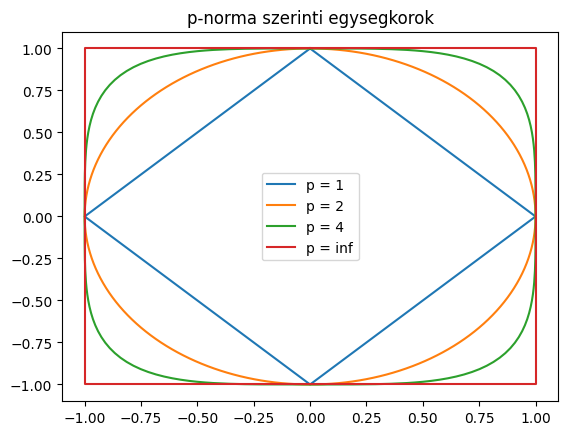

In [12]:
for p in [1, 2,4,np.inf]:
    plt.plot(*unit_circle(201, p), label=f"p = {p}")
plt.title("p-norma szerinti egysegkorok")
plt.legend()

### P4. Feladat

Írjunk programot az

$$
A_n = \left(\matrix{2 & -1 & 0 & \dots & 0\cr -1 & 2 & -1 & \dots & 0 \cr 0 & -1 & 2 & \dots & 0 \cr \vdots & \ddots & \ddots & \ddots& \vdots \cr 0 & \dots & 0 & -1 & 2}\right)
$$

és a

$$
H_n = \left(\matrix{1 & 1/2 & 1/3 & \dots & 1/n \cr 1/2 & 1/3 & 1/4 & \dots & 1/(n+1) \cr 1/3 & 1/4 & 1/5 & \dots & 1/(n+2) \cr \vdots & \vdots & \vdots & \vdots& \vdots \cr 1/n & 1/(n+1) & 1/(n+2) & \dots & 1/(2n-1)}\right)
$$

mátrixok megkonstruálására, majd számíttassuk is ki ezek 1-es, illetve 2-es norma szerinti kondíciószámát egy megfelelő parancs segítségével.

In [ ]:
def mtx_a(n: int) -> np.ndarray:
    return np.diag(-np.ones(n-1), -1) + np.diag(2*np.ones(n), 0) + np.diag(-np.ones(n-1), 1)


In [ ]:
mtx_a(3)

In [ ]:
def mtx_h(n: int) -> np.ndarray:
    v = np.array(list(range(n)))
    return 1 / (v.reshape((-1, 1)) + (v+1))

In [ ]:
mtx_h(3)

### P5. Feladat

Állítsuk elő azt az $A \in \mathbb{R}^{100 \times 100}$ mátrixot, melynek elemei az alábbi értékek:

$$
a_{ij}=\begin{cases}
1, &i=j, \\
-1, &i<j, \\
0 &\text{egyébként.}
\end{cases}
$$

Legyen $b=[-98, -97, \dots, 0, 1]^{T}$ és tekintsük az $Ax = b$ egyenletrendszert.

a) Jól kondícionált a feladat?

In [27]:
def a26(n):
    return np.eye(n) - np.triu(np.ones((n, n)), 1)
    
a26(100)

array([[ 1., -1., -1., ..., -1., -1., -1.],
       [ 0.,  1., -1., ..., -1., -1., -1.],
       [ 0.,  0.,  1., ..., -1., -1., -1.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1., -1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]], shape=(100, 100))

In [28]:
def b26(n):
    return np.array(list(range(n))) - (n-2)

In [29]:
b26(100)

array([-98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86,
       -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73,
       -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60,
       -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47,
       -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34,
       -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21,
       -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1])

In [30]:
from numpy.linalg import cond
cond(a26(100), p=1)

np.float64(6.338253001141147e+31)

b) Tegyük fel, hogy a $b$ vektor hibával terhelten áll csak a rendelkezésünkre: az utolsó eleme legyen $1$ helyett $1.0001$. Adjunk becslést a megoldásban keletkező hiba relatív mértékére $1$-es, $\infty$-normákban, majd oldjuk meg a két egyenletrendszert és számítsuk ki a hiba pontos mértékét.

In [31]:
def delta_b26(n):
    return 1e-4 * np.roll(np.eye(1, n), -1).ravel()

In [32]:
delta_b26(100)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.0001])

In [36]:
from numpy.linalg import cond, solve

In [37]:
def x26(n):
    return solve(a26(n), b26(n))
    
def delta_x26(n):
    return solve(a26(n), delta_b26(n))

In [38]:
def f26(n, p):
    return {
        "becsles": p_norm(delta_b26(n), p)/p_norm(b26(n), p) * cond(a26(n), p),
        "tenyleges": p_norm(delta_x26(n), p) / p_norm(x26(n), p)
    }

In [39]:
f26(100, 1)

{'becsles': np.float64(1.306317601224474e+24),
 'tenyleges': np.float64(6.338253001141147e+23)}

In [40]:
f26(100, np.inf)

{'becsles': np.float64(6.467605103205253e+25),
 'tenyleges': np.float64(3.1691265005705737e+25)}

c) Oldjuk meg a b) feladatrészt $2$-es norma választással. Mit tapasztalunk?

In [41]:
# Láthatjuk, hogy a 2-es kondíciószám kiszámítása problematikus tud lenni
# kis n-ekre még jó, azonban pl. n=100-ra már nem

In [42]:
f26(10, 2)

{'becsles': np.float64(0.01339929359490504),
 'tenyleges': np.float64(0.009347833973707491)}

In [43]:
f26(50, 2)

{'becsles': np.float64(5953973120.282097),
 'tenyleges': np.float64(4596467122.019238)}

In [44]:
f26(100, 2)

{'becsles': np.float64(631370414537.1393),
 'tenyleges': np.float64(3.6593920764007947e+24)}